<a href="https://colab.research.google.com/github/Hari-Priya-18/Image-denoising/blob/main/rad_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

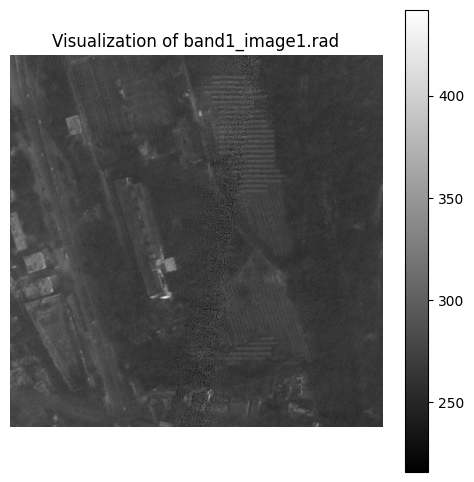

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
file_path = '/content/band1_image1.rad'
image_shape = (512, 512)
dtype = np.uint16
with open(file_path, 'rb') as f:
    image = np.fromfile(f, dtype=dtype)

image = image.reshape(image_shape)

# Visualize
plt.figure(figsize=(6, 6))
plt.imshow(image, cmap='gray')
plt.title('Visualization of band1_image1.rad')
plt.axis('off')
plt.colorbar()
plt.show()

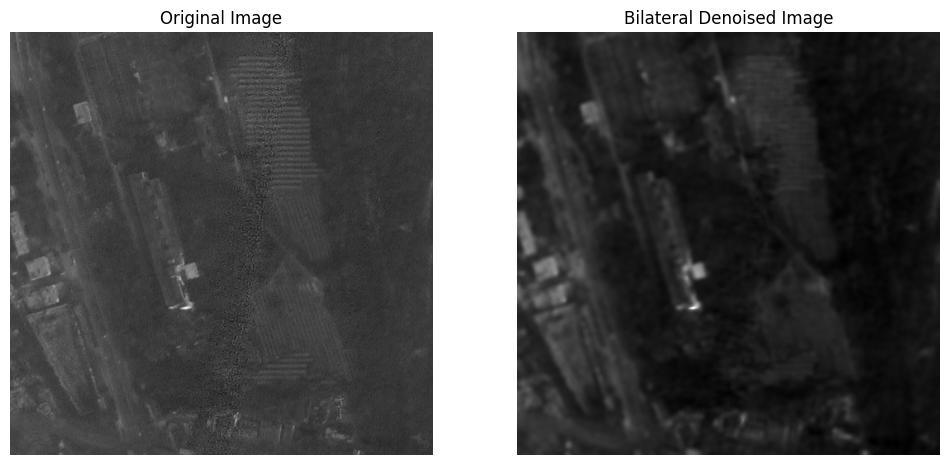

In [ ]:
import cv2
import matplotlib.pyplot as plt
denoised = cv2.bilateralFilter(image.astype(np.float32), d=9, sigmaColor=75, sigmaSpace=75)

# Show original and denoised side by side
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(denoised, cmap='gray')
plt.title("Bilateral Denoised Image")
plt.axis('off')

plt.show()

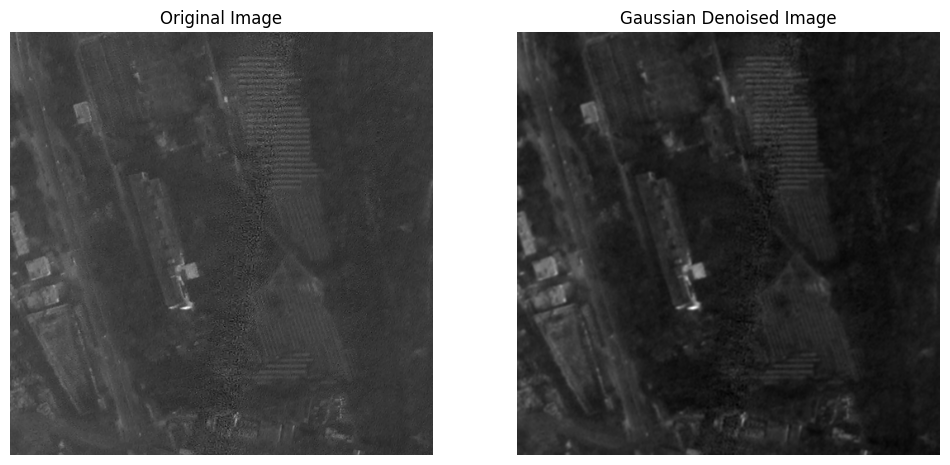

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os
gaussian_denoised = cv2.GaussianBlur(image.astype(np.float32), (5, 5), sigmaX=0)

# Plot original and denoised images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gaussian_denoised, cmap='gray')
plt.title("Gaussian Denoised Image")
plt.axis('off')

plt.show()

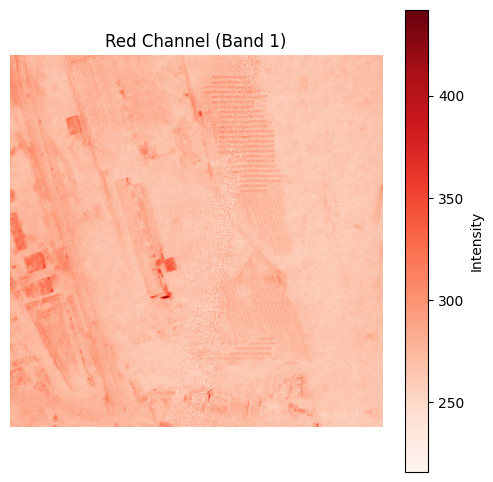

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Load the .rad image file as grayscale
def load_rad_image(path, shape=(512, 512)):  # Update shape if known
    with open(path, 'rb') as f:
        image = np.fromfile(f, dtype=np.uint16).reshape(shape)
    return image

# Load Red Channel
red_channel = load_rad_image('/content/band1_image1.rad')

# Visualize Red Channel
plt.figure(figsize=(6, 6))
plt.imshow(red_channel, cmap='Reds')
plt.title("Red Channel (Band 1)")
plt.axis('off')
plt.colorbar(label='Intensity')
plt.show()

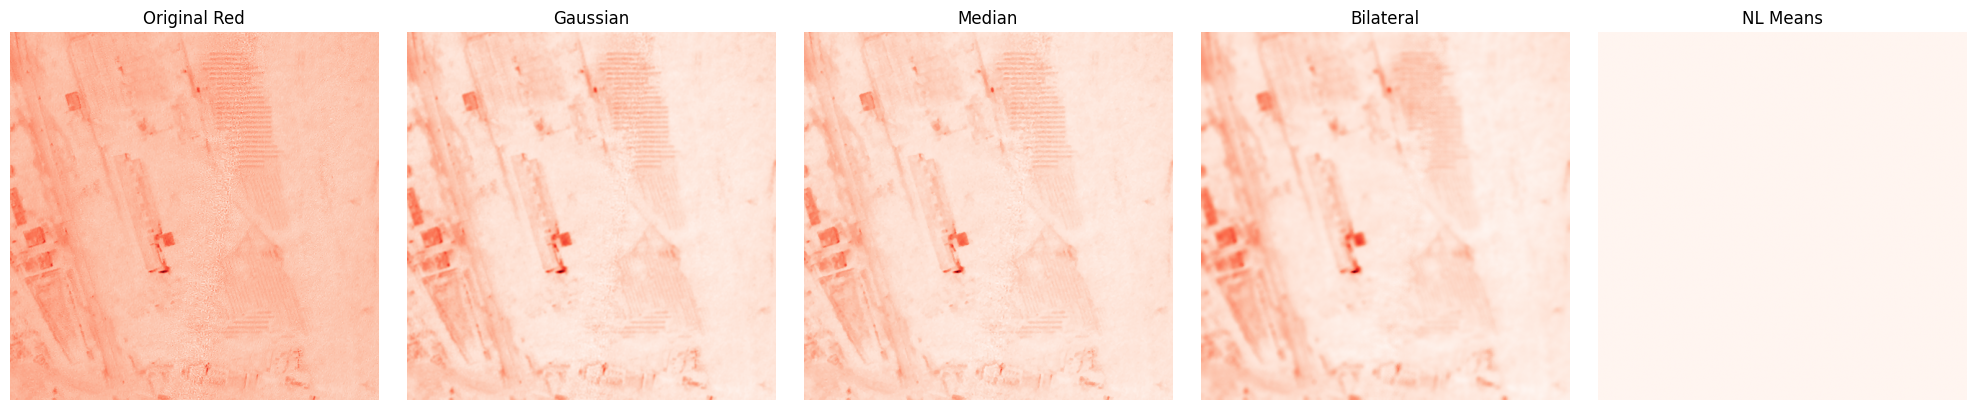

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter, median_filter
import cv2
from skimage.restoration import denoise_nl_means, estimate_sigma

# Step 1: Load .rad file
def load_rad_image(path, shape=(512, 512)):  # Change shape if needed
    with open(path, 'rb') as f:
        image = np.fromfile(f, dtype=np.uint16).reshape(shape)
    return image

# Load Red Channel
red_channel = load_rad_image('/content/band1_image1.rad')

# Step 2: Denoising Techniques
# 1. Gaussian Blur
gaussian = gaussian_filter(red_channel, sigma=1)

# 2. Median Filter
median = median_filter(red_channel, size=3)

# 3. Bilateral Filter (OpenCV needs uint8 format)
bilateral = cv2.bilateralFilter(red_channel.astype(np.float32), d=9, sigmaColor=75, sigmaSpace=75)

# 4. Non-Local Means
sigma_est = np.mean(estimate_sigma(red_channel, channel_axis=None))
nlm = denoise_nl_means(red_channel, h=1.15 * sigma_est, fast_mode=True,
                       patch_size=5, patch_distance=6, channel_axis=None)
nlm = (nlm * 255).astype(np.uint8)

# Step 3: Visualization
fig, axs = plt.subplots(1, 5, figsize=(20, 4))
axs[0].imshow(red_channel, cmap='Reds')
axs[0].set_title("Original Red")
axs[1].imshow(gaussian, cmap='Reds')
axs[1].set_title("Gaussian")
axs[2].imshow(median, cmap='Reds')
axs[2].set_title("Median")
axs[3].imshow(bilateral, cmap='Reds')
axs[3].set_title("Bilateral")
axs[4].imshow(nlm, cmap='Reds')
axs[4].set_title("NL Means")
for ax in axs:
    ax.axis('off')
plt.tight_layout()
plt.show()